<a href="https://colab.research.google.com/github/kajanthyS/478Project/blob/main/image_denoising_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import cv2
import os
from skimage import measure
import math
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio
from math import log10, sqrt


In [156]:
#Colour Images 
I = cv2.imread('/landscape.jpg') 
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

In [ ]:
#Grayscale Images 
Igs = cv2.imread('/landscape.jpg', 0)

In [157]:
# Add gaussian noise
noisy = random_noise(I, mode='gaussian',var=0.01) 

In [158]:
# Calculating mse
def performance(imageA, imageB):
    input = imageA.astype("float")
    output = imageB.astype("float")
    mse = mean_squared_error(input, output)
    rmse = math.sqrt(mse)

    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / rmse)

    #Colour image 
    ssim_value = ssim(input, output,
                  data_range=output.max() - output.min(), multichannel=True)
    
    # # Grayscale image 
    # ssim_value = ssim(input, output,
    #               data_range=output.max() - output.min())
    
    print(f"RMSE value is {rmse}")
    print(f"PSNR value is {psnr} dB")
    print(f"SSIM value is {ssim_value}")

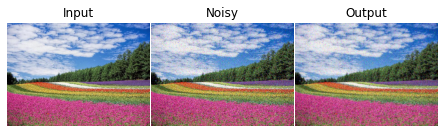

RMSE value is 28.82357856703678
PSNR value is 18.93584562288375 dB
SSIM value is 0.4734518734904716


In [164]:
# Apply the mean filter 
output = cv2.boxFilter(noisy,-1,(3,3))
# or use cv2.blur() as shown below
# output = cv2.blur(noisy,(3,3))
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
 plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
 plt.title(image_name[i]), plt.axis('off')
 plt.tight_layout(.1)
plt.show()
performance(I,output)

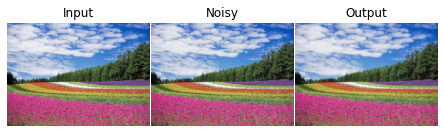

RMSE value is 14.322091808616806
PSNR value is 25.010674541709186 dB
SSIM value is 0.8087800936081164


In [160]:
# Apply the bilateral filter 
#Input: 8-bit or floating-point, 1-channel or 3-channel image.
noisy8 = np.asarray(255*noisy, dtype = 'uint8')
output = cv2.bilateralFilter(noisy8,9,75,75)
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
 plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
 plt.title(image_name[i]), plt.axis('off')
 plt.tight_layout(.1)
plt.show()
performance(I,output)

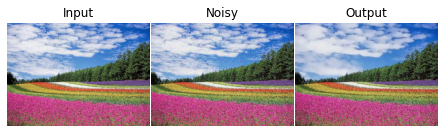

RMSE value is 17.420882771275608
PSNR value is 23.30940044257112 dB
SSIM value is 0.798514498548232


In [161]:
# Apply the nonlocal means filter (Colour Image)
output = cv2.fastNlMeansDenoisingColored(noisy8,None,10,10,7,21)
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
 plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
 plt.title(image_name[i]), plt.axis('off')
 plt.tight_layout(.1)
plt.show()

performance(I,output)

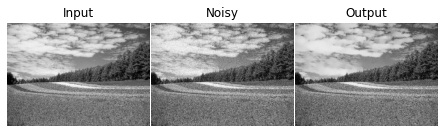

RMSE value is 20.97377097760121
PSNR value is 21.697273180079563 dB
SSIM value is 0.7504833072616269


In [145]:
# Apply the nonlocal means filter (Grayscale Image)
noisy_img=cv2.cvtColor(noisy8, cv2.COLOR_GRAY2BGR)
output = cv2.fastNlMeansDenoisingColored(noisy_img,None,10,10,7,21)
output = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
 plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
 plt.title(image_name[i]), plt.axis('off')
 plt.tight_layout(.1)
plt.show()

performance(I,output)

In [162]:
#Add salt and pepper noise 
noisy = random_noise(I, mode='s&p',amount=0.05)
# The above function returns a floating-point image on the range [0, 1],
# thus we changed it to 'uint8' and from [0,255]
noisy = np.array(255*noisy, dtype = 'uint8')

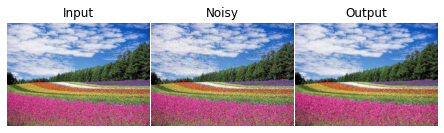

RMSE value is 27.600259121050566
PSNR value is 19.312540420770294 dB
SSIM value is 0.6201820150338017


In [165]:
# Apply median filter 
output = cv2.medianBlur(noisy,3)
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
 plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
 plt.title(image_name[i]), plt.axis('off')
 plt.tight_layout(.1)
plt.show()
performance(I,output)